In [1]:
# Load libraries
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
from string import ascii_letters
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
#Importing Data
chemistries_discovery=pd.DataFrame.from_csv('chemistries_git.csv')
chemistries_discovery.index=chemistries_discovery.index.astype('float64')
chemistries_validation=pd.DataFrame.from_csv('chemistries_val_git.csv')
prot=pd.DataFrame.from_csv('cleaned_proteomics.csv')
prot.index=prot.index.astype('float64')
prot_validation=pd.DataFrame.from_csv('proteomics_validation_impute.csv')
prot_validation.index=prot_validation.index.astype('float64')
print (len(prot))
print (len(prot_validation))
print (len(chemistries_discovery))
print (len(chemistries_validation))
prot.drop(['sex','age'],1,inplace=True)
prot['shannon']=chemistries_discovery['shannon']

262
176
399
540


(399, 77)


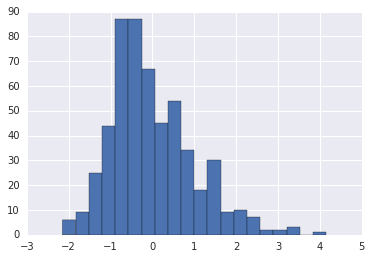

In [3]:
#Scale and standardize chemistries
C = chemistries_discovery.loc[:,chemistries_discovery.columns!='shannon']
C_validation = chemistries_validation.loc[:,chemistries_validation.columns!='shannon']
y = chemistries_discovery['shannon']
y_validation = chemistries_validation['shannon']
#y, _ = stats.boxcox(y)
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
Ccolumns=C.columns
Cindex=C.index
C = scaler.fit_transform(C)
C=pd.DataFrame(data=C,columns=Ccolumns,index=Cindex)
print (C.shape)
sns.set(font_scale=1.00)
Ccolumns=C_validation.columns
Cindex=C_validation.index
C_validation = scaler.fit_transform(C_validation)
C_validation=pd.DataFrame(data=C_validation,columns=Ccolumns,index=Cindex)
C_validation[C_validation.columns[4]].hist(bins=20)

In [4]:
alphas = np.linspace(1,1000,200)
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=10)
clinical_lasso=cross_val_score(lassocv,C,y,cv=10)
print ('LASSO Clinical Labs mean R2 discovery',np.mean(clinical_lasso))
print ('LASSO Clinical Labs std.dev. R2 discovery',np.std(clinical_lasso))
clinical_ridge=cross_val_score(ridgecv,C,y,cv=10)
print ('Ridge Clinical Labs mean R2 discovery',np.mean(clinical_ridge))
print ('Ridge Clinical Labs std.dev. R2 discovery',np.std(clinical_ridge))

LASSO Clinical Labs mean R2 discovery 0.014287995440638768
LASSO Clinical Labs std.dev. R2 discovery 0.07241550295868537
Ridge Clinical Labs mean R2 discovery 0.04968931335136732
Ridge Clinical Labs std.dev. R2 discovery 0.06435409714104452


In [5]:
clinical_lasso_validation=cross_val_score(lassocv,C_validation,y_validation,cv=10)
print ('LASSO Clinical Labs mean R2 validation cohort',np.mean(clinical_lasso_validation))
print ('LASSO Clinical Labs std.dev. R2 validation cohort',np.std(clinical_lasso_validation))
clinical_ridge_validation=cross_val_score(ridgecv,C_validation,y_validation,cv=10)
print ('Ridge Clinical Labs mean R2 validation cohort',np.mean(clinical_ridge_validation))
print ('Ridge Clinical Labs std.dev. R2 validation cohort',np.std(clinical_ridge_validation))

LASSO Clinical Labs mean R2 validation cohort 0.05260391509880893
LASSO Clinical Labs std.dev. R2 validation cohort 0.07047866142625173
Ridge Clinical Labs mean R2 validation cohort 0.08103277313739068
Ridge Clinical Labs std.dev. R2 validation cohort 0.06488894598247667


In [6]:
#Scale and standardize chemistries
p = prot.loc[:,prot.columns!='shannon']
py = prot['shannon']
p_validation = prot_validation.loc[:,prot_validation.columns!='shannon']
y = chemistries_discovery['shannon']
y_validation = prot_validation['shannon']
#y, _ = stats.boxcox(y)
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
pcolumns=p.columns
pindex=p.index
p = scaler.fit_transform(p)
p=pd.DataFrame(data=p,columns=pcolumns,index=pindex)
print (p.shape)
Ccolumns=p_validation.columns
Cindex=p_validation.index
p_validation = scaler.fit_transform(p_validation)
p_validation=pd.DataFrame(data=p_validation,columns=Ccolumns,index=Cindex)

(262, 263)


In [7]:
p_lasso=cross_val_score(lassocv,p,py,cv=10)
print ('LASSO Proteomics mean R2 discovery cohort',np.mean(p_lasso))
print ('LASSO Proteomics std dev. R2 discovery cohort',np.std(p_lasso))
p_ridge=cross_val_score(ridgecv,p,py,cv=10)
print ('Ridge Proteomics mean R2 discovery cohort',np.mean(p_ridge))
print ('Ridge Proteomics std dev. R2 discovery cohort',np.std(p_ridge))

LASSO Proteomics mean R2 discovery cohort 0.10675946100201447
LASSO Proteomics std dev. R2 discovery cohort 0.07052447103195425
Ridge Proteomics mean R2 discovery cohort 0.13076525647821394
Ridge Proteomics std dev. R2 discovery cohort 0.07477626432175494


In [8]:
alphas = np.linspace(800,1000,200)
ridgecv=RidgeCV(alphas=alphas,fit_intercept=True,normalize=False,cv=5)
lassocv=LassoCV(eps=0.175, n_alphas=200, alphas=None, fit_intercept=True, normalize=False, precompute='auto', cv=10)
p_lasso_validation=cross_val_score(lassocv,p_validation,y_validation,cv=10)
print ('LASSO Proteomics mean R2 discovery cohort',np.mean(p_lasso_validation))
print ('LASSO Proteomics std dev. R2 discovery cohort',np.std(p_lasso_validation))
p_ridge_validation=cross_val_score(ridgecv,p_validation,y_validation,cv=10)
print ('Ridge Proteomics mean R2 discovery cohort',np.mean(p_ridge_validation))
print ('Ridge Proteomics std dev. R2 discovery cohort',np.std(p_ridge_validation))

LASSO Proteomics mean R2 discovery cohort -0.06853768285695391
LASSO Proteomics std dev. R2 discovery cohort 0.23708603639510709
Ridge Proteomics mean R2 discovery cohort -0.0016715443399101478
Ridge Proteomics std dev. R2 discovery cohort 0.16112518292100103
